# Part I - Exploring the Prosper Loan Dataset
## By Sondos Aabed

> My Github: [@sondosaabed](https://github.com/sondosaabed) 

> My LinkedIn: [@sondosaabed](https://www.linkedin.com/in/sondosaabed/)

<hr/>

## Table of Contents
- Introduction
    - Data Dictionary
- Objectives
- Premirely Wrangling
- Univariate extrapolation
- Bivariate extrapolation
- Multivariate extrapolation
- Conclusions

<hr/>

## Introduction

> In this notebook, the analysis is done on the Prosper Datatset which is collected from a Loan company. The dataset includes customers who have paid off their loans, who have been past due and put into collection without paying back their loan and interests, and who have paid off only after they were put in collection. The original dataset contains 113937 rows and 81 columns out of which 12 features of intrest were selected.

### Data Dictionary
The following data dictionary shows each variable of the dataset and the corresponding description:

| Variable                                | Description                                                                                                                                                                   |
|-----------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ListingKey                              | Unique key for each listing, same value as the 'key' used in the listing object in the API.                                                                                   |
| ListingNumber                           | The number that uniquely identifies the listing to the public as displayed on the website.                                                                                    |
| ListingCreationDate                     | The date the listing was created.                                                                                                                                             |
| CreditGrade                             | The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.                 |
| Term                                    | The length of the loan expressed in months.                                                                                                                                   |
| LoanStatus                              | The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket. |
| ClosedDate                              | Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses.                                                                                   |
| BorrowerAPR                             | The Borrower's Annual Percentage Rate (APR) for the loan.                                                                                                                     |
| BorrowerRate                            | The Borrower's interest rate for this loan.                                                                                                                                   |
| LenderYield                             | The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.                                                                  |
| EstimatedEffectiveYield                 | Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009. |
| EstimatedLoss                           | Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.                                                                |
| EstimatedReturn                         | The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009. |
| ProsperRating (numeric)                 | The Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.  |
| ProsperRating (Alpha)                   | The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.                                            |
| ProsperScore                            | A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009. |
| ListingCategory                         | The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7 - Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans |
| BorrowerState                           | The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.                                                                   |
| Occupation                              | The Occupation selected by the Borrower at the time they created the listing.                                                                                                 |
| EmploymentStatus                        | The employment status of the borrower at the time they posted the listing.                                                                                                    |
| EmploymentStatusDuration                | The length in months of the employment status at the time the listing was created.                                                                                            |
| IsBorrowerHomeowner                     | A Borrower will be classified as a homeowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.                        |
| CurrentlyInGroup                        | Specifies whether or not the Borrower was in a group at the time the listing was created.                                                                                     |
| GroupKey                                | The Key of the group in which the Borrower is a member of. Value will be null if the borrower does not have a group affiliation.                                              |
| DateCreditPulled                        | The date the credit profile was pulled.                                                                                                                                       |
| CreditScoreRangeLower                   | The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.                                                         |
| CreditScoreRangeUpper                   | The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency.                                                         |
| FirstRecordedCreditLine                 | The date the first credit line was opened.                                                                                                                                    |
| CurrentCreditLines                      | Number of current credit lines at the time the credit profile was pulled.                                                                                                     |
| OpenCreditLines                         | Number of open credit lines at the time the credit profile was pulled.                                                                                                        |
| TotalCreditLinespast7years              | Number of credit lines in the past seven years at the time the credit profile was pulled.                                                                                     |
| OpenRevolvingAccounts                   | Number of open revolving accounts at the time the credit profile was pulled.                                                                                                  |
| OpenRevolvingMonthlyPayment             | Monthly payment on revolving accounts at the time the credit profile was pulled.                                                                                              |
| InquiriesLast6Months                    | Number of inquiries in the past six months at the time the credit profile was pulled.                                                                                         |
| TotalInquiries                          | Total number of inquiries at the time the credit profile was pulled.                                                                                                          |
| CurrentDelinquencies                    | Number of accounts delinquent at the time the credit profile was pulled.                                                                                                      |
| AmountDelinquent                        | Dollars delinquent at the time the credit profile was pulled.                                                                                                                 |
| DelinquenciesLast7Years                 | Number of delinquencies in the past 7 years at the time the credit profile was pulled.                                                                                        |
| PublicRecordsLast10Years                | Number of public records in the past 10 years at the time the credit profile was pulled.                                                                                      |
| PublicRecordsLast12Months               | Number of public records in the past 12 months at the time the credit profile was pulled.                                                                                     |
| RevolvingCreditBalance                  | Dollars of revolving credit at the time the credit profile was pulled.                                                                                                        |
| BankcardUtilization                     | The percentage of available revolving credit that is utilized at the time the credit profile was pulled.                                                                      |
| AvailableBankcardCredit                 | The total available credit via bank card at the time the credit profile was pulled.                                                                                           |
| TotalTrades                             | Number of trade lines ever opened at the time the credit profile was pulled.                                                                                                  |
| TradesNeverDelinquent                   | Number of trades that have never been delinquent at the time the credit profile was pulled.                                                                                   |
| TradesOpenedLast6Months                 | Number of trades opened in the last 6 months at the time the credit profile was pulled.                                                                                       |
| DebtToIncomeRatio                       | The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%). |
| IncomeRange                             | The income range of the borrower at the time the listing was created.                                                                                                         |
| IncomeVerifiable                        | The borrower indicated they have the required documentation to support their income.                                                                                          |
| StatedMonthlyIncome                     | The monthly income the borrower stated at the time the listing was created.                                                                                                   |
| LoanKey                                 | Unique key for each loan. This is the same key that is used in the API.                                                                                                       |
| TotalProsperLoans                       | Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans.                                       |
| TotalProsperPaymentsBilled              | Number of on time payments the borrower made on Prosper loans at the time they created this listing. This value will be null if the borrower had no prior loans.             |
| OnTimeProsperPayments                   | Number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans.         |
| ProsperPaymentsLessThanOneMonthLate     | Number of payments the borrower made on Prosper loans that were less than one month late at the time they created this listing. This value will be null if the borrower had no prior loans. |
| ProsperPaymentsOneMonthPlusLate         | Number of payments the borrower made on Prosper loans that were greater than one month late at the time they created this listing. This value will be null if the borrower had no prior loans. |
| ProsperPrincipalBorrowed                | Total principal borrowed on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.                                     |
| ProsperPrincipalOutstanding             | Principal outstanding on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.                                        |
| ScorexChangeAtTimeOfListing             | Borrower's credit score change at the time the credit profile was pulled. This will be the change relative to the borrower's last Prosper loan. This value will be null if the borrower had no prior loans. |
| LoanCurrentDaysDelinquent               | The number of days delinquent.                                                                                                                                               |
| LoanFirstDefaultedCycleNumber           | The cycle the loan was charged off. If the loan has not charged off the value will be null.                                                                                   |
| LoanMonthsSinceOrigination              | Months since the loan originated.                                                                                                                                            |
| LoanNumber                              | The number that uniquely identifies the loan to the public as displayed on the website.                                                                                      |
| LoanOriginalAmount                      | The original amount of the loan.                                                                                                                                             |
| LoanOriginationDate                     | The date the loan originated.                                                                                                                                                |
| LoanOriginationQuarter                  | The quarter in which the loan originated.                                                                                                                                    |
| MemberKey                               | Unique key for each member. This is the same key that is used in the API.                                                                                                     |
| MonthlyLoanPayment                      | The monthly payment (principal and interest) the borrower is required to make for this loan.                                                                                 |
| LP_CustomerPayments                     | The total payments (principal + interest) that have been made on the loan by the borrower.                                                                                   |
| LP_CustomerPrincipalPayments            | The total principal payments that have been made on the loan by the borrower.                                                                                                |
| LP_InterestandFees                      | Interest and fees paid by the borrower.                                                                                                                                      |
| LP_ServiceFees                          | The servicing fees paid by the borrower.                                                                                                                                    |
| LP_CollectionFees                       | The collection fees paid by the borrower.                                                                                                                                   |
| LP_GrossPrincipalLoss                   | Gross principal loss on the loan.                                                                                                                                           |
| LP_NetPrincipalLoss                     | Net principal loss on the loan.                                                                                                                                             |
| LP_NonPrincipalRecoverypayments         | Non-principal recovery payments on the loan.                                                                                                                                |
| PercentFunded                           | The percentage of the loan that was funded.                                                                                                                                 |
| Recommendations                         | Number of recommendations the borrower had at the time they created the listing.                                                                                            |
| InvestmentFromFriendsCount              | Number of investments that were made by friends at the time the listing was created.                                                                                        |
| InvestmentFromFriendsAmount             | The dollar amount of investments that were made by friends at the time the listing was created.                                                                              |
| Investors                               | The number of investors that funded the loan.                                                                                                                               |


<hr/>

## Objectives

**1.  Loan Performance Analysis**

**2.  Credit Score and Borrower Analysis**

**3.  Geographic and Demographic Analysis**

<hr/>

## Preliminary Wrangling

- In this section, a preliminary data wrangling is done on the dataset. 

In [1]:
## import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

c:\Users\SS\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading the dataset

> Let's Load in the dataset into a pandas dataframe:

In [2]:
df = pd.read_csv("./data/prosperLoanData.csv") ## Load the csv into pandas dataframe
df.sample(10) ## Looking at a random sample of 10 rows.

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
89396,522435803124450551D167F,796219,2013-06-03 18:11:11.817000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-214.82,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
66329,CD2435638856954192AA8E9,682194,2012-12-04 06:24:02.113000000,NaN,36,Completed,2013-05-02 00:00:00,0.32538,0.2859,0.2759,...,-15.06,0.0,0.0,0.0,0.0,1.0,0,0,0.0,79
57866,811B3553828282161FA98C0,616886,2012-07-25 20:22:43.937000000,NaN,36,Completed,2013-01-04 00:00:00,0.20462,0.1679,0.1579,...,-15.48,0.0,0.0,0.0,0.0,1.0,0,0,0.0,48
68993,71C2340109095088293289C,204704,2007-09-21 00:36:36.917000000,AA,36,Completed,2008-04-24 00:00:00,0.08694,0.0801,0.0751,...,-6.22,0.0,0.0,0.0,0.0,1.0,0,0,0.0,63
68782,FDB1357349001237607843C,729927,2013-03-14 16:51:11.260000000,NaN,36,Current,NaN,0.23530,0.1979,0.1879,...,-75.73,0.0,0.0,0.0,0.0,1.0,0,0,0.0,163
79820,1CB13601952390901F76B99,1172289,2014-01-30 12:50:33.480000000,NaN,36,Current,NaN,0.17151,0.1355,0.1255,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,130
107870,2260360104242486260A5C5,1142878,2014-02-04 13:01:44.540000000,NaN,60,Current,NaN,0.16662,0.1435,0.1335,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
55104,BD9335910112976028271D0,969276,2013-10-09 19:02:28.670000000,NaN,60,Current,NaN,0.22242,0.1980,0.1880,...,-38.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
106857,F4533393067041235BB5B50,157991,2007-06-25 16:35:41.160000000,AA,36,Completed,2007-07-17 00:00:00,0.14709,0.1400,0.1350,...,-2.40,0.0,0.0,0.0,0.0,1.0,0,0,0.0,191
44207,5A1735791083505443D330B,785172,2013-05-21 06:09:04.963000000,NaN,60,Current,NaN,0.12205,0.0999,0.0899,...,-100.99,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


### Dataset Structure

In [3]:
df.shape ## showing the shape of the dataset

(113937, 81)

> This dataset has 113,937 rows and 81 columns. Which is a relatively big dataset.

### Dataset Assessment and Cleaning

#### Duplicated Records

In [4]:
df.duplicated(subset='LoanKey').sum()

871

> Let's identify the duplicated records based on the LoanKey and see if wwe should handle this

In [5]:
duplicates = df[df.duplicated(subset='LoanKey', keep=False)]
display(duplicates.head(10))

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
29,0F563597161095613517437,1051243,2013-12-17 09:18:33.220000000,NaN,36,Current,NaN,0.15223,0.1239,0.1139,...,-29.73,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
176,106335993636414276CB477,1119836,2014-01-08 14:27:50.320000000,NaN,36,Current,NaN,0.32446,0.2850,0.2750,...,-3.40,0.0,0.0,0.0,0.0,1.0,0,0,0.0,5
313,09233589620788733CFB8CE,930842,2013-09-25 08:03:11.860000000,NaN,36,Current,NaN,0.19144,0.1550,0.1450,...,-36.97,0.0,0.0,0.0,0.0,1.0,0,0,0.0,169
349,313635901230654318A9030,931467,2013-09-26 18:50:29.053000000,NaN,36,Current,NaN,0.17090,0.1349,0.1249,...,-15.40,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
442,09AD35918712001025AC1BD,969821,2013-10-24 13:21:31.607000000,NaN,36,Current,NaN,0.20524,0.1685,0.1585,...,-8.41,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
444,09CD3592594126374FB0A7C,986199,2013-10-18 08:28:03.610000000,NaN,36,Current,NaN,0.22773,0.1905,0.1805,...,-42.03,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
455,31C73597152310464749E00,1092437,2013-12-23 13:47:35.500000000,NaN,36,Current,NaN,0.17151,0.1355,0.1255,...,-6.40,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
461,44F2358557406858060EBDE,870200,2013-08-15 07:12:49.410000000,NaN,60,Current,NaN,0.18965,0.1660,0.1560,...,-49.69,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [6]:
df.drop_duplicates(subset='LoanKey', keep='first', inplace=True) ## Dropping the duplicated records and keeping only the first record

In [7]:
print(df.duplicated(subset='LoanKey').sum()) ## Checking the drop of duplicted 
df.shape

0


(113066, 81)

> Let's check for the duplicated records based on the `ListingKey` based on teh documentation it has to be unique too.

In [8]:
df.duplicated(subset='ListingKey').sum() ## checking for duliated based on the listing key 

0

#### Data types Validity

- Assessment: Let's look at the data types of these variables and assess them using `.info`:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113066 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113066 non-null  object 
 1   ListingNumber                        113066 non-null  int64  
 2   ListingCreationDate                  113066 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113066 non-null  int64  
 5   LoanStatus                           113066 non-null  object 
 6   ClosedDate                           55076 non-null   object 
 7   BorrowerAPR                          113041 non-null  float64
 8   BorrowerRate                         113066 non-null  float64
 9   LenderYield                          113066 non-null  float64
 10  EstimatedEffectiveYield              83982 non-null   float64
 11  EstimatedLoss     

> We have the columns of `ClosedDate`, `LoanOriginationDate`, `DateCreditPulled`, and the `ListingCreationDate` has an object type and it has to be a datetime type.

In [10]:
## listing the date columns
date_columns = ['ClosedDate', 'LoanOriginationDate', 'DateCreditPulled', 'ListingCreationDate'] 

### Loopong through the list and coverting to datetime data type
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='mixed') ## using the format as mixed to infer the format for each element individually

df.info() ### check if that is successful

<class 'pandas.core.frame.DataFrame'>
Index: 113066 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113066 non-null  object        
 1   ListingNumber                        113066 non-null  int64         
 2   ListingCreationDate                  113066 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113066 non-null  int64         
 5   LoanStatus                           113066 non-null  object        
 6   ClosedDate                           55076 non-null   datetime64[ns]
 7   BorrowerAPR                          113041 non-null  float64       
 8   BorrowerRate                         113066 non-null  float64       
 9   LenderYield                          113066 non-null  float64       
 10  E

> Now the rest of the data types of the variables are valid.

#### Data Completness

In [11]:
def get_percent_null(df):
    """
    Args:
        - df (pd.Dataframe)
    Returns:
        - The percentages of missing values
    """
    null_counts = df.isnull().sum()
    null_counts = null_counts[null_counts > 0].sort_values()
    return (null_counts/df.shape[0])*100

In [12]:
get_percent_null(df) 

BorrowerAPR                             0.022111
CreditScoreRangeUpper                   0.522704
CreditScoreRangeLower                   0.522704
PublicRecordsLast10Years                0.616454
CurrentDelinquencies                    0.616454
InquiriesLast6Months                    0.616454
TotalCreditLinespast7years              0.616454
FirstRecordedCreditLine                 0.616454
DelinquenciesLast7Years                 0.875595
TotalInquiries                          1.025065
EmploymentStatus                        1.994410
Occupation                              3.121186
BorrowerState                           4.877682
AvailableBankcardCredit                 6.672209
TradesOpenedLast6Months                 6.672209
TradesNeverDelinquent (percentage)      6.672209
TotalTrades                             6.672209
CurrentCreditLines                      6.725276
OpenCreditLines                         6.725276
PublicRecordsLast12Months               6.725276
RevolvingCreditBalan

> There are many columns that has null values, some of which have a very high count of null values. The following columns were the highest percentage of null such as higher than 50%. These columns are droppped.

In [13]:
high_missing_percent = ['CreditGrade', 'ScorexChangeAtTimeOfListing', 'LoanFirstDefaultedCycleNumber', 'ClosedDate', 'TotalProsperLoans',
 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 
 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding'] ## list of columns with missing values higher than 50% 

In [14]:
df.drop(columns= high_missing_percent, inplace=True) ## Drop the list of high percentage columns

In [15]:
df.shape ## Check if the dropping was successful

(113066, 70)

> The drop is checked now that the variables went from 81 to 70.

Handling the other null values by dropping NA values and rows:

In [16]:
get_percent_null(df)

BorrowerAPR                            0.022111
CreditScoreRangeUpper                  0.522704
CreditScoreRangeLower                  0.522704
TotalCreditLinespast7years             0.616454
CurrentDelinquencies                   0.616454
FirstRecordedCreditLine                0.616454
PublicRecordsLast10Years               0.616454
InquiriesLast6Months                   0.616454
DelinquenciesLast7Years                0.875595
TotalInquiries                         1.025065
EmploymentStatus                       1.994410
Occupation                             3.121186
BorrowerState                          4.877682
AvailableBankcardCredit                6.672209
TradesOpenedLast6Months                6.672209
TotalTrades                            6.672209
TradesNeverDelinquent (percentage)     6.672209
PublicRecordsLast12Months              6.725276
RevolvingCreditBalance                 6.725276
BankcardUtilization                    6.725276
CurrentCreditLines                     6

> These columns are identifiers, mostly unique between each loan.They are irrelevant for the task and therefore they should be dropped too.

In [17]:
df.columns 

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'Term',
       'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTra

In [18]:
## List of identifiers and other irrelevant columns
identifiers = ["ListingKey", "ListingNumber", "GroupKey", "LoanKey", "LoanNumber", "MemberKey", "DateCreditPulled"]
df.drop(columns= identifiers, axis= 1, inplace= True ) ## Dropping irrelevant columns

In [19]:
df.shape ## 

(113066, 63)

> The drop is done, since the features count went down to 63.

In [20]:
get_percent_null(df)

BorrowerAPR                            0.022111
CreditScoreRangeUpper                  0.522704
CreditScoreRangeLower                  0.522704
InquiriesLast6Months                   0.616454
TotalCreditLinespast7years             0.616454
FirstRecordedCreditLine                0.616454
PublicRecordsLast10Years               0.616454
CurrentDelinquencies                   0.616454
DelinquenciesLast7Years                0.875595
TotalInquiries                         1.025065
EmploymentStatus                       1.994410
Occupation                             3.121186
BorrowerState                          4.877682
AvailableBankcardCredit                6.672209
TradesOpenedLast6Months                6.672209
TotalTrades                            6.672209
TradesNeverDelinquent (percentage)     6.672209
PublicRecordsLast12Months              6.725276
RevolvingCreditBalance                 6.725276
BankcardUtilization                    6.725276
OpenCreditLines                        6

> Let's handle the lower percentages by only dropping the NA values instead of the whole columns.

In [21]:
df.dropna(inplace=True)

In [22]:
get_percent_null(df)

Series([], dtype: float64)

> No missing NA values left.

In [23]:
df.shape

(75486, 63)

> After handling missing values and dropping unneccary columns the shape of the data is 76,216 rows and 63 columns

> wWe want to create a simplified version of this columns, since there are multiple values for the Due Past values.

In [24]:
df['LoanStatus'].unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

In [25]:
df['SimplifiedLoanStatus'] = df['LoanStatus'].apply(lambda x: 'Past Due' if 'Past Due' in x else x)
df.head(10)

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,SimplifiedLoanStatus
1,2014-02-27 08:28:07.900,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Current
3,2012-10-22 11:02:35.010,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,Current
4,2013-09-14 18:38:39.097,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,Current
5,2013-12-14 08:26:37.093,60,Current,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Current
6,2013-04-12 09:52:56.147,36,Current,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Current
7,2013-05-05 06:49:27.493,36,Current,0.23939,0.2019,0.1919,0.17830,0.0799,0.09840,4.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Current
8,2013-12-02 10:43:39.117,36,Current,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Current
10,2012-05-10 07:04:01.577,60,Current,0.27462,0.2489,0.2389,0.23320,0.0890,0.14420,4.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,19,Current
12,2013-12-15 20:01:10.757,36,Past Due (1-15 days),0.17969,0.1435,0.1335,0.12640,0.0524,0.07400,5.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,Past Due
13,2013-07-15 16:28:28.087,36,Current,0.13138,0.1034,0.0934,0.09050,0.0274,0.06310,6.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,171,Current


### Main Features of interest
- All the left columns are the features of intrest they will be devided based on the objective into three subsets.

- Objective 1: Loan Performance

In [26]:
loan_performance_columns = [ 'LoanStatus','SimplifiedLoanStatus' , 'LoanCurrentDaysDelinquent','LoanMonthsSinceOrigination',
    'LoanOriginalAmount', 'BorrowerAPR', 'DebtToIncomeRatio', 'CreditScoreRangeLower','CreditScoreRangeUpper',
    'ProsperScore', 'EmploymentStatus','IsBorrowerHomeowner']

loan_performance_df = df[loan_performance_columns]
print(loan_performance_df.shape)
loan_performance_df.head()

(75486, 12)


,LoanStatus,SimplifiedLoanStatus,LoanCurrentDaysDelinquent,LoanMonthsSinceOrigination,LoanOriginalAmount,BorrowerAPR,DebtToIncomeRatio,CreditScoreRangeLower,CreditScoreRangeUpper,ProsperScore,EmploymentStatus,IsBorrowerHomeowner
1,Current,Current,0,0,10000,0.12016,0.18,680.0,699.0,7.0,Employed,False
3,Current,Current,0,16,10000,0.12528,0.15,800.0,819.0,9.0,Employed,True
4,Current,Current,0,6,15000,0.24614,0.26,680.0,699.0,4.0,Employed,True
5,Current,Current,0,3,15000,0.15425,0.36,740.0,759.0,10.0,Employed,True
6,Current,Current,0,11,3000,0.31032,0.27,680.0,699.0,2.0,Employed,False


- Objective 2: Credit Score and Borrower Analysis

In [27]:
credit_borrower_columns = [ 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'ProsperRating (numeric)',
    'ProsperRating (Alpha)','ProsperScore','IncomeRange','EmploymentStatus','IsBorrowerHomeowner',
    'BorrowerAPR', 'LoanOriginalAmount']

credit_borrower_df = df[credit_borrower_columns]
print(credit_borrower_df.shape)
credit_borrower_df.head()

(75486, 10)


,CreditScoreRangeLower,CreditScoreRangeUpper,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,IncomeRange,EmploymentStatus,IsBorrowerHomeowner,BorrowerAPR,LoanOriginalAmount
1,680.0,699.0,6.0,A,7.0,"$50,000-74,999",Employed,False,0.12016,10000
3,800.0,819.0,6.0,A,9.0,"$25,000-49,999",Employed,True,0.12528,10000
4,680.0,699.0,3.0,D,4.0,"$100,000+",Employed,True,0.24614,15000
5,740.0,759.0,5.0,B,10.0,"$100,000+",Employed,True,0.15425,15000
6,680.0,699.0,2.0,E,2.0,"$25,000-49,999",Employed,False,0.31032,3000


- Objective 3: Geographic and Demographic Analysis

In [28]:
geo_demo_columns = [ 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IncomeRange',
    'IsBorrowerHomeowner', 'LoanOriginalAmount', 'ProsperRating (Alpha)', 'CreditScoreRangeLower',
    'CreditScoreRangeUpper']

geo_demo_df = df[geo_demo_columns]
print(geo_demo_df.shape)
geo_demo_df.head()

(75486, 9)


,BorrowerState,Occupation,EmploymentStatus,IncomeRange,IsBorrowerHomeowner,LoanOriginalAmount,ProsperRating (Alpha),CreditScoreRangeLower,CreditScoreRangeUpper
1,CO,Professional,Employed,"$50,000-74,999",False,10000,A,680.0,699.0
3,GA,Skilled Labor,Employed,"$25,000-49,999",True,10000,A,800.0,819.0
4,MN,Executive,Employed,"$100,000+",True,15000,D,680.0,699.0
5,NM,Professional,Employed,"$100,000+",True,15000,B,740.0,759.0
6,KS,Sales - Retail,Employed,"$25,000-49,999",False,3000,E,680.0,699.0


**Store the cleaned dataset**

In [29]:
df.to_csv('./data/prosperLoanDataCleaned.csv') ## Load the csv into pandas dataframe

## Univariate Exploration

> In this section, we are investigating distributions of individual variables. To see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables. the "Question-Visualization-Observations" framework is used throughout the exploration, it involves asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.

**1. Loan Status**

**Question**: What are the distribution of the Loan Statuses?

In [30]:
## add orderring to the loan status and include the cancelled ones
loan_status_order = ['Cancelled', 'Completed', 'FinalPaymentInProgress', 'Current',
                     'Past Due', 'Chargedoff', 'Defaulted']

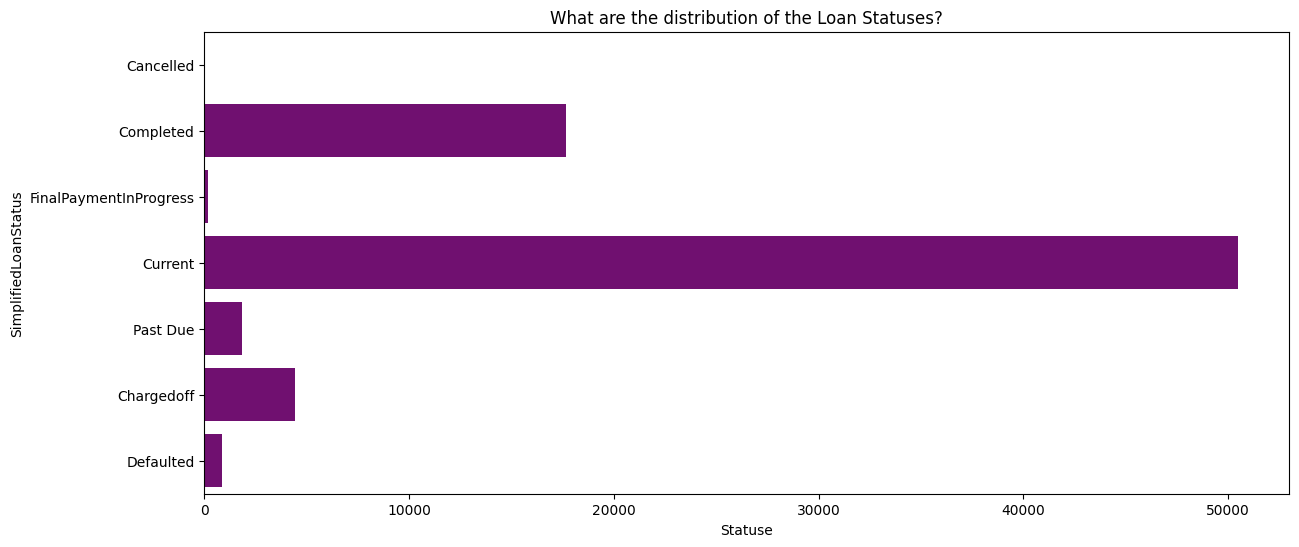

In [31]:
plt.figure(figsize=(14, 6))
sns.countplot(data = loan_performance_df, y = 'SimplifiedLoanStatus', color = 'purple', order=loan_status_order)
plt.xlabel('Statuse')
plt.title('What are the distribution of the Loan Statuses?');

> It seems that the majority status among the loan statuses is the `current` which is 50462, While the completed are success story they are  `17675`. The chargedoff however are 4444 cases they are failed loans. While the `deafulted` are the cases in danger of `chargedoff` they reach 885. And the past due are slightly larger 1835 but still not in danger of charge off. 

> The chraged off and the deafulted represntts the actual risks for these loans.

> Nothing unusual with this distribution.

**2. The Loan Original Amount**

Let's take a look into the Loan Original Amounts.

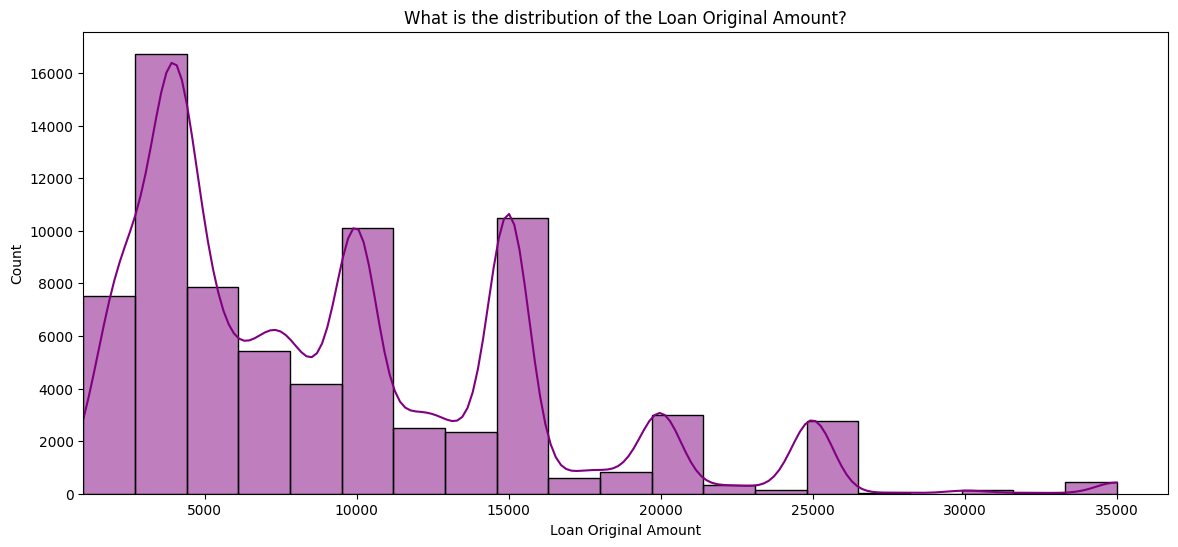

In [32]:
plt.figure(figsize=(14, 6))
sns.histplot(data= credit_borrower_df,  x = 'LoanOriginalAmount', bins=20, kde= True, color = 'purple')
plt.title('What is the distribution of the Loan Original Amount?')
plt.ylabel('Count')
plt.xlim(1000)
plt.xlabel('Loan Original Amount');

> The distribution of the Loan Original Amount is right skewed, with multiple peaks suggesting distinct borrower groups. Most loans are relatively small, but there are outliers indicating larger, less frequent loan amounts. However these are numerical outliers but valid values for a given loan amount, so doesn't need to be handled.

**3. Borrower State**

Which states are the borrowers from?

In [33]:
borrower_states_counts = geo_demo_df['BorrowerState'].value_counts()

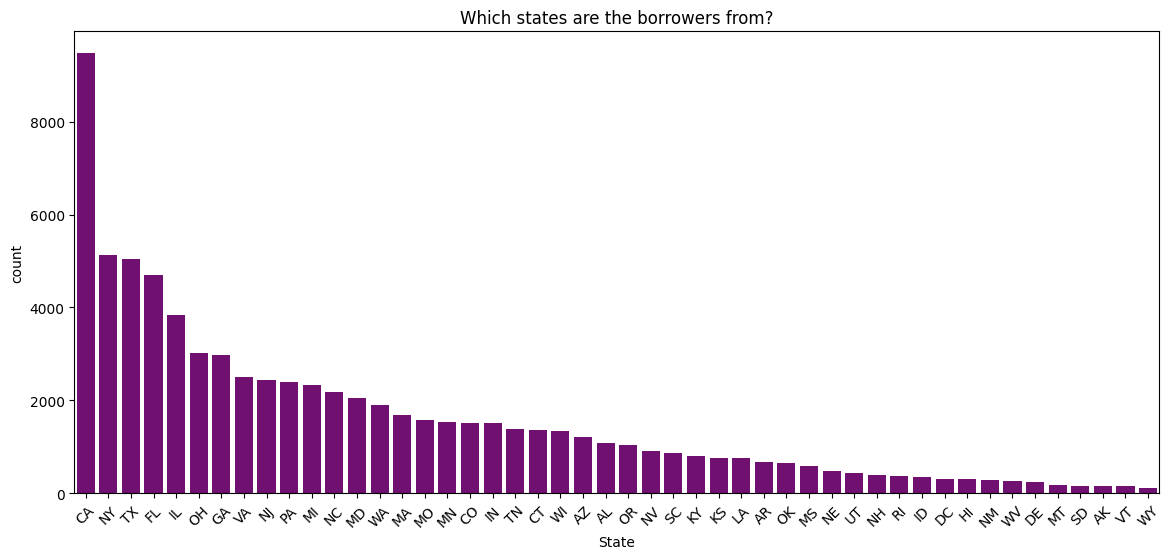

In [34]:
plt.figure(figsize=(14, 6))
ax = sns.barplot(borrower_states_counts, color = 'purple')
plt.title('Which states are the borrowers from?')
plt.xlabel('State')
plt.xticks(rotation = 45);

> California boasts the highest number of borrowers among all US states, followed closely by Texas, New York, and Florida. On the other end of the spectrum, states like South Dakota, Alaska, Vermont, and Wyoming have significantly lower borrower counts.

> California is an unpper bound outlier, however this is numerically and valid values that will not be handled.

## Bivariate Exploration

> In this section, relationships between pairs of variables in the data are investigated. The variables of intreset that have been introduced in the previous sections. Questions are asked.

**Question:** Does having investors affect the monthly loan payments?

In [35]:
df['Investors'].corr(df['MonthlyLoanPayment'])

0.30761429000108165

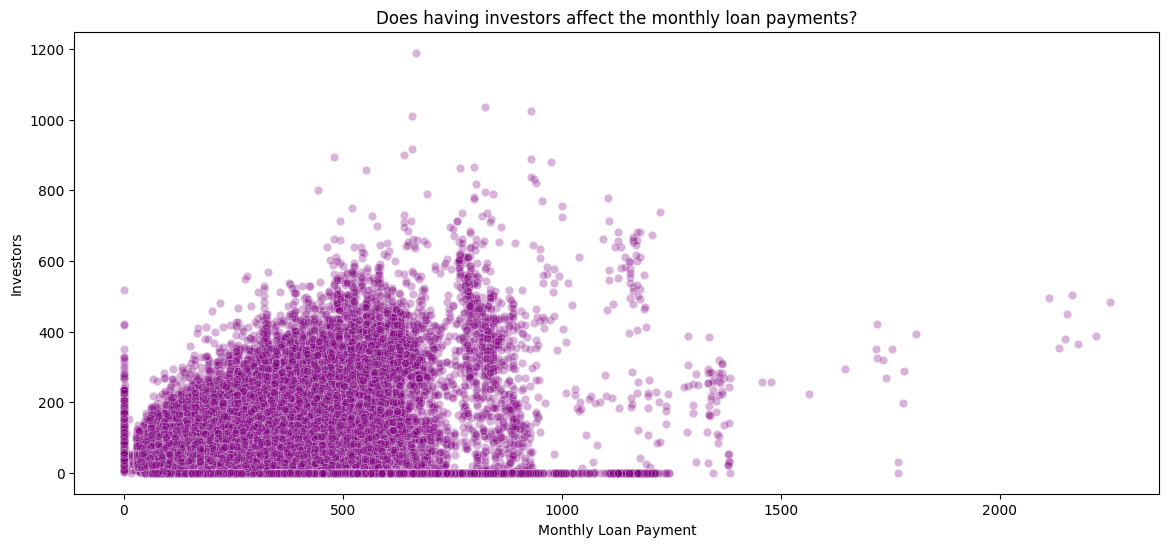

In [36]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data= df, x='MonthlyLoanPayment', y='Investors', alpha=0.3, color = 'purple')
plt.title('Does having investors affect the monthly loan payments?')
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Investors');

> There is a positive correlation between the number of investors and the monthly loan payments, with a correlation coefficient of 0.3. This indicates that as the number of investors increases, the monthly loan payments also tend to increase.

> Some outliers are observed, with loans having over 600 investors and monthly payments exceeding 1000.

> A few loans with very high monthly payments (above 2000) are also present, indicating significant loan amounts or terms.

> The plot shows a dense cluster of points with fewer than 200 investors and monthly payments below 500, suggesting this is the most common scenario.

**Question:** Does Loan status have unusual loan original amount?

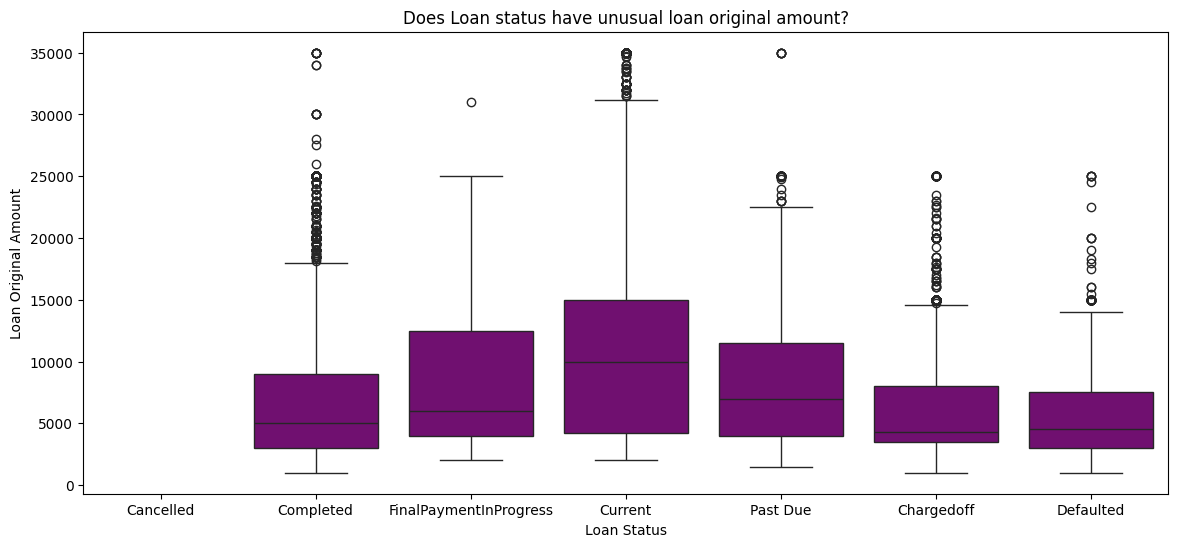

In [37]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=loan_performance_df, x='SimplifiedLoanStatus', y='LoanOriginalAmount', color='purple', order= loan_status_order)
plt.title('Does Loan status have unusual loan original amount?')
plt.xlabel('Loan Status')
plt.ylabel('Loan Original Amount');

> All loan statuses have outliers, indicating some loans are significantly larger than most others in their respective categories.

> Completed loans exhibit the most outliers, suggesting a wide variation in loan amounts within this category.

> Charged-off loans also show a considerable number of outliers.

> Current Loans, The highest upper outliers are observed in the current loan status, indicating some very large loans are currently active.

**Question:** How does the Original Amount of Loan change over time?

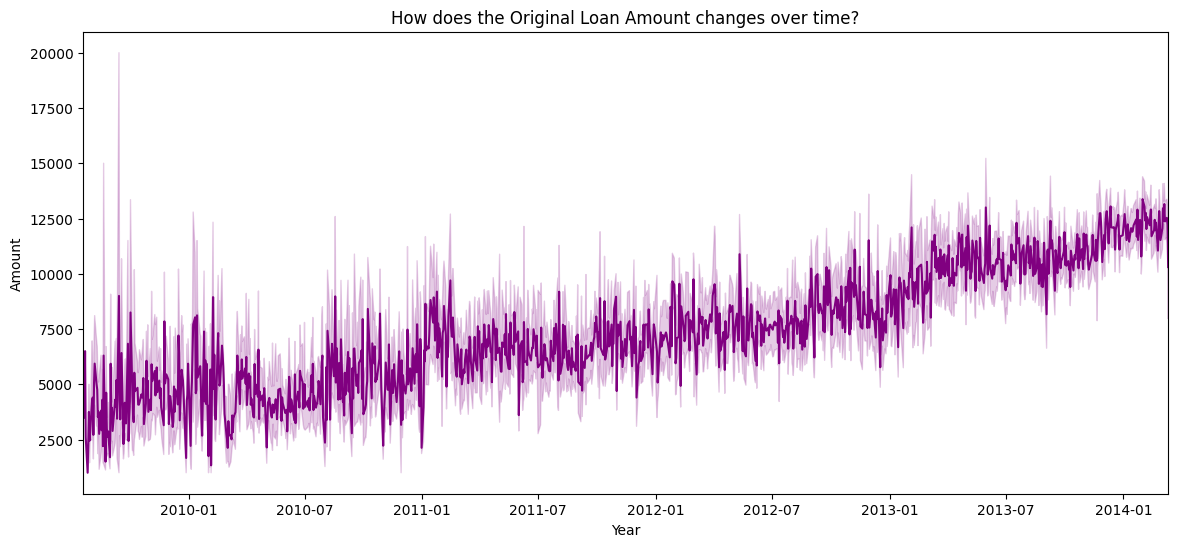

In [38]:
plt.figure(figsize=(14, 6))
sns.lineplot(data= df, x = 'LoanOriginationDate', y ='LoanOriginalAmount', color = 'purple')
plt.ylabel('Amount')
plt.xlabel('Year')
plt.xlim(pd.to_datetime('2009-07-20'), pd.to_datetime('2014-03-12')) ## the max and min dates of the Loan Origination Date
plt.title('How does the Original Loan Amount changes over time?');

> There is a noticeable increase in loan amounts over the years, suggesting that borrowers have been taking out larger loans as time progresses.

> Interestingly, the year 2009 stands out with some of the highest loan amounts, indicating that during this period, there were notably larger loans compared to other years.

**Question:** Does employment status have unuaual credit score lower range?

In [39]:
employment_status_oredr = ['Employed', 'Full-time', 'Part-time', 'Self-employed', 'Retired', 'Not employed', 'Other']

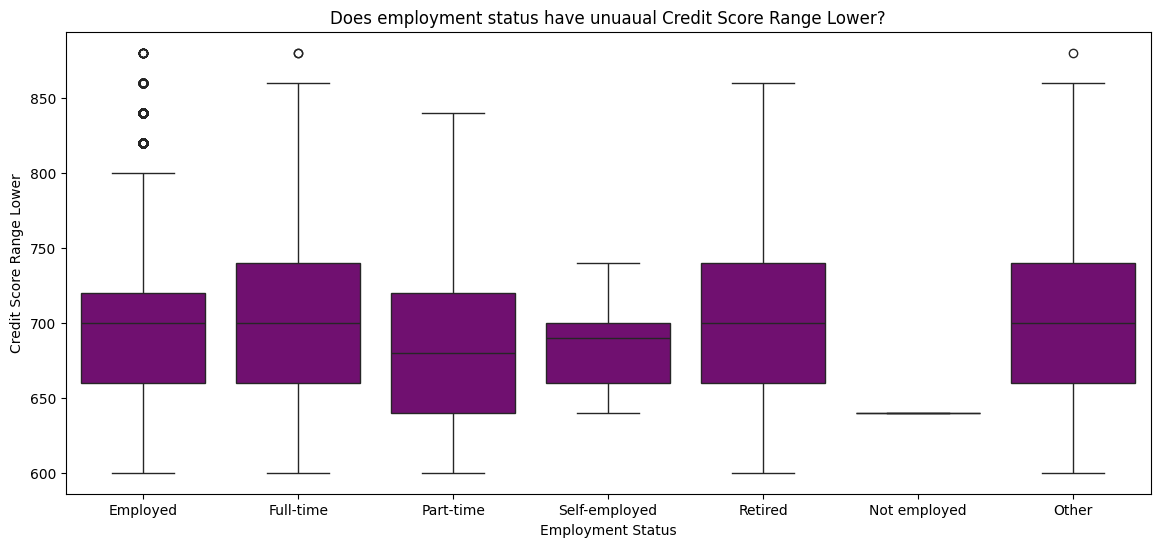

In [40]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=credit_borrower_df, x='EmploymentStatus', y='CreditScoreRangeLower', color='purple', order=employment_status_oredr)
plt.title('Does employment status have unuaual Credit Score Range Lower?')
plt.xlabel('Employment Status')
plt.ylabel('Credit Score Range Lower');

> Employed borrowers have a wide range of credit scores, with some higher outliers. This indicates that while most employed borrowers have moderate to high credit scores, there are a few with exceptionally high scores.

> Borrowers in the "Other" and "Full-time" categories have similar distributions of credit scores, generally higher than those of employed borrowers. These groups also include some high outliers, suggesting that a subset of these borrowers have excellent credit.

> Self-employed borrowers tend to have lower credit scores compared to other groups, with a narrower range and fewer outliers.

> Not employed borrowers have the lowest and least variable credit scores, indicating financial instability or limited credit history.

**Question:** What are the employment statuses of students who are taking loans?

In [41]:
## List of students occupations ordered by their natural order
study_occupations = ['Student - College Freshman',  'Student - College Sophomore',  'Student - College Junior', 
 'Student - Community College', 'Student - Technical School']

## Labels for the visualization
labels = ['College Freshman', 'College Sophomore', 'College Junior', 'Community College', 'Technical School']

## the natural order of employment staus
employment_status_hue_oredr = ['Employed', 'Full-time', 'Part-time', 'Not employed']

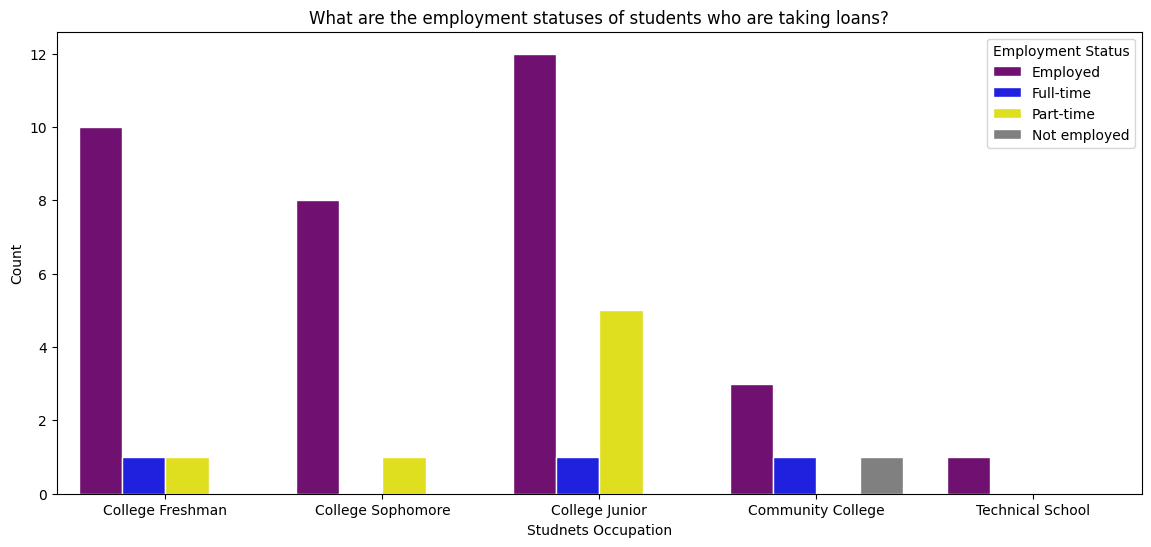

In [42]:
plt.figure(figsize=(14, 6))
sns.countplot(data=geo_demo_df[geo_demo_df['Occupation'].isin(study_occupations)], x='Occupation', palette=['purple','blue', 'yellow',  'grey'], 
              hue='EmploymentStatus', hue_order=employment_status_hue_oredr,  order = study_occupations, edgecolor = 'white')
plt.title('What are the employment statuses of students who are taking loans?')
plt.xlabel('Studnets Occupation')
plt.ylabel('Count')
plt.xticks(ticks= study_occupations, labels= labels)
plt.legend(title='Employment Status');

> Employment is widespread among students taking loans, with the majority falling into the "Employed" category across all educational levels.

> Part-time work appears to be the most common arrangement, indicated by the higher count of "Part-time" compared to "Full-time" in most categories. Expected since they are students.

> Community college students exhibit a notably higher proportion of full-time employment compared to other groups.

> The "Technical School" category shows a lower overall employment rate and a higher percentage of students who are not employed.

**Question:** What are intresting relationships between variables in the dataset?

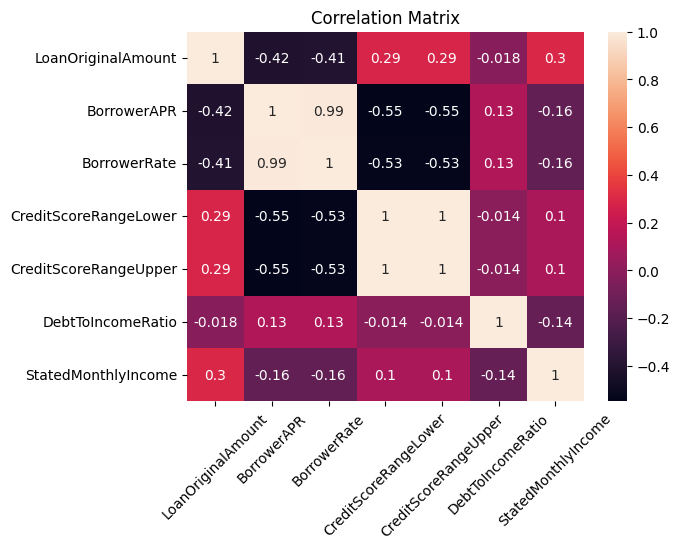

In [43]:
intrest_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'BorrowerRate',
    'CreditScoreRangeLower', 'CreditScoreRangeUpper',
    'DebtToIncomeRatio', 'StatedMonthlyIncome']
subset = df[intrest_vars]
sns.heatmap(subset.corr(), annot=True)
plt.xticks(rotation = 45)
plt.title("Correlation Matrix");

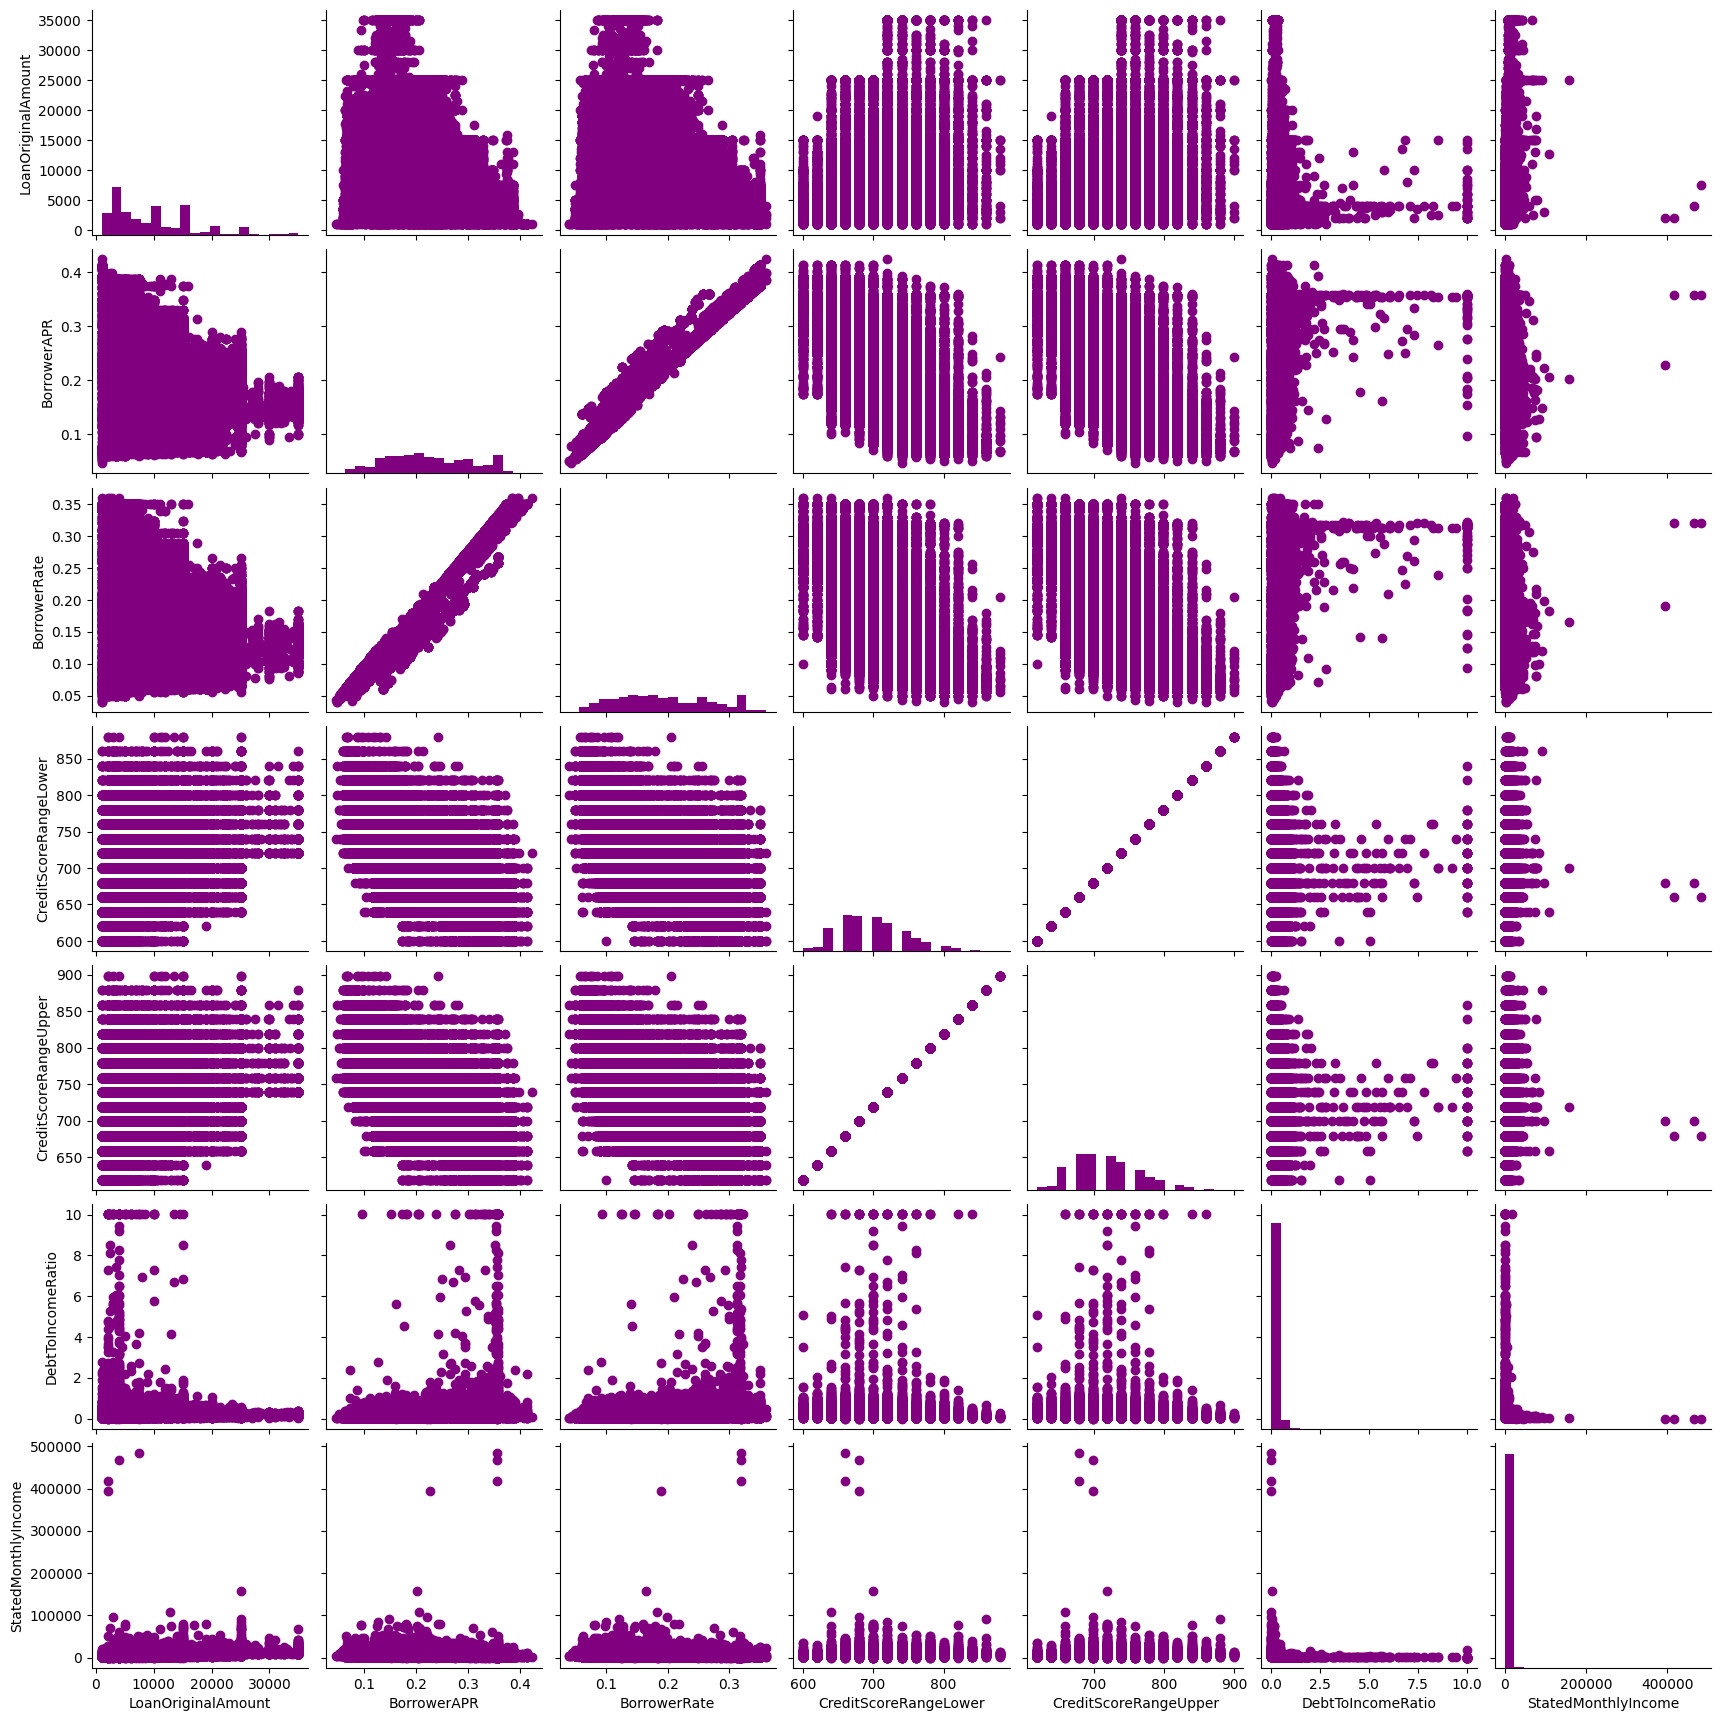

In [44]:
grid = sns.PairGrid(data = df, vars = intrest_vars )
grid.map_diag(plt.hist, bins = 20,color='purple')
grid.map_offdiag(plt.scatter,color='purple')
grid.tight_layout();

> Positive correlation between `borrowerAPR` and `BorrowerRate`.

> `Debit Income Ratio` has a low positive correlation with bith the `credit scire range lower and the upper range`.

> `LoanOriginalAmount` and `StatedMonthlyIncome` have a moderate positive correlation (0.3). This indicates that individuals with higher incomes tend to borrow larger amounts.

> `BorrowerAPR` and `CreditScoreRangeLower` have a moderate negative correlation (-0.55). This suggests that borrowers with higher credit scores tend to have lower APRs.

> There is no other intresting correlations between the variables.

## Multivariate Exploration

> In this section, plots of three or more variables are created to investigate the data even further. 

**Question:** How does the original loan amount relate to the borrower's APR across different loan statuses?

In [45]:
## this list is the natural order of loan status
loan_status_order = [ 'Completed','FinalPaymentInProgress','Current', 'Past Due','Chargedoff','Defaulted']

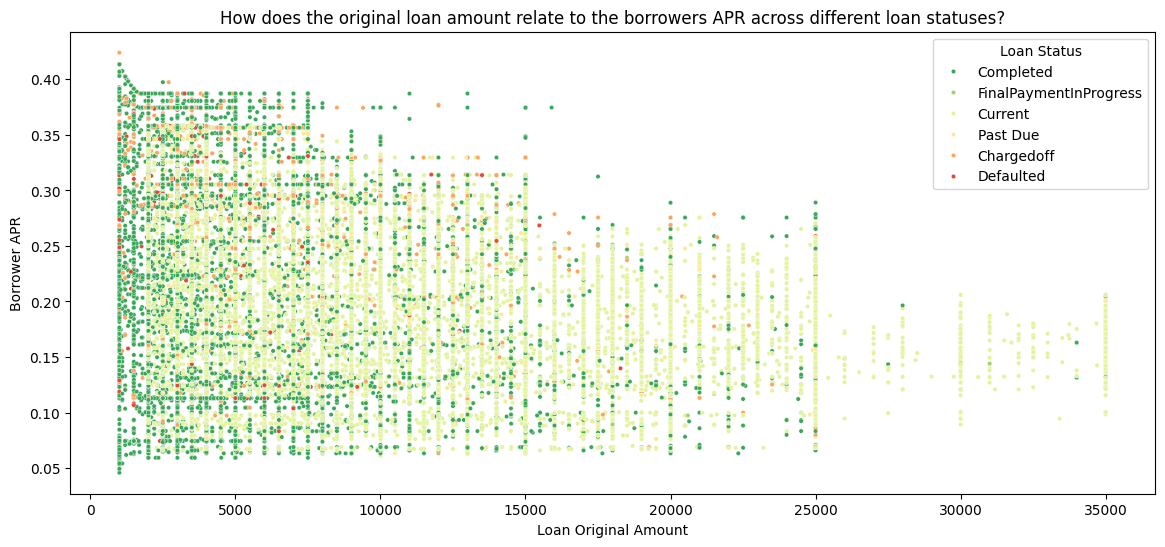

In [46]:
## Scatterplot with multiple encodings, color encoding with ordered categories
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='LoanOriginalAmount', y='BorrowerAPR', hue='SimplifiedLoanStatus',
                hue_order=loan_status_order, palette='RdYlGn_r', s = 10)
plt.title('How does the original loan amount relate to the borrowers APR across different loan statuses?')
plt.ylabel('Borrower APR')
plt.xlabel('Loan Original Amount')
plt.legend(title = 'Loan Status', loc='upper right');

> The majority of data points cluster in the lower left region, indicating that most loans have lower original amounts and APRs.

> A few data points appear as outliers, situated away from the main cluster. These represent loans with significantly higher original amounts or APRs compared to the majority.

> The current loans have different and varying APRs and loan amounts. While most of the completed, dedfaulted, and chargedoff are in the lower region.

**Question:** How does the original loan amount vary across different income ranges and loan statuses?

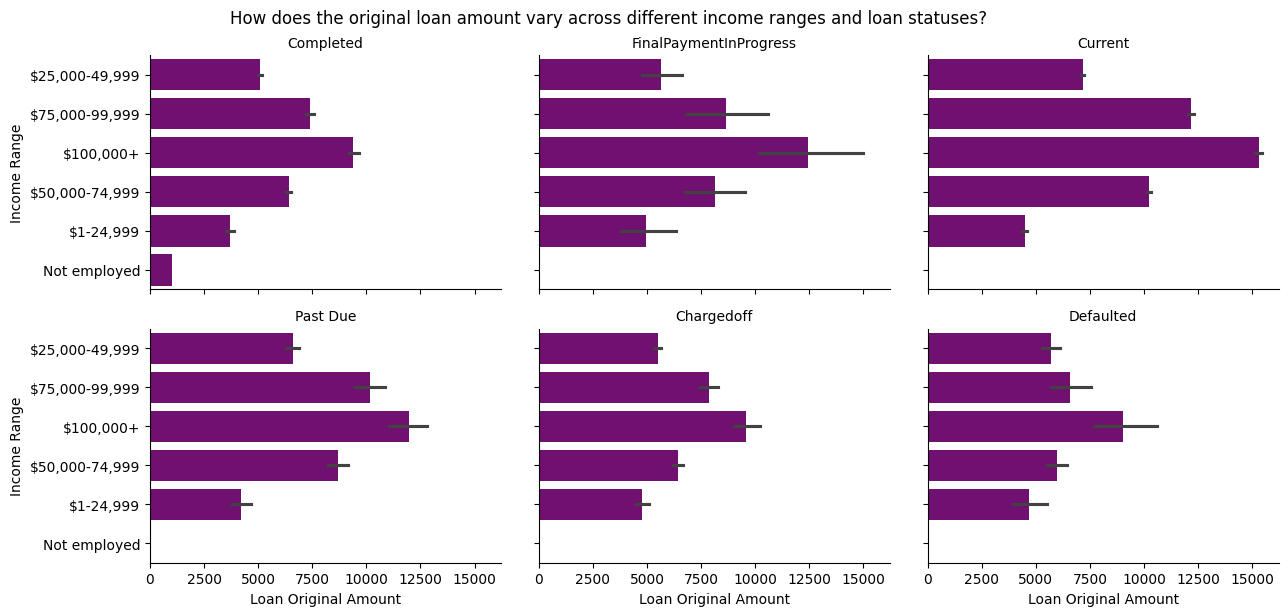

In [47]:
## Facet Plotting three variables SimplifiedLoanStatus, LoanOriginalAmount and IncomeRange
grid = sns.FacetGrid(data = df, col = 'SimplifiedLoanStatus', col_wrap = 3, col_order= loan_status_order)
grid.map(sns.barplot, 'LoanOriginalAmount', 'IncomeRange', color = 'Purple')
grid.set_titles("{col_name}")
grid.set_axis_labels('Loan Original Amount', 'Income Range')
plt.suptitle('How does the original loan amount vary across different income ranges and loan statuses?', y=1.02)
grid.figure.set_size_inches(14, 6);

> As income range increases, the loan original amount also tends to increase. This is evident in the length of the bars across different income ranges.

> The "Current" and "Completed" statuses, where the highest loan original amount is not always associated with the highest income range.

> Higher income ranges might be associated with fewer defaults, which is worth investigating.

> Across all loan statuses, the highest Loans amounts are associated with the 100,000+ income range. 

**Question:** How do different terms group with the selected variables?

In [48]:
selected_columns = ['LoanOriginalAmount', 'BorrowerAPR','DebtToIncomeRatio']

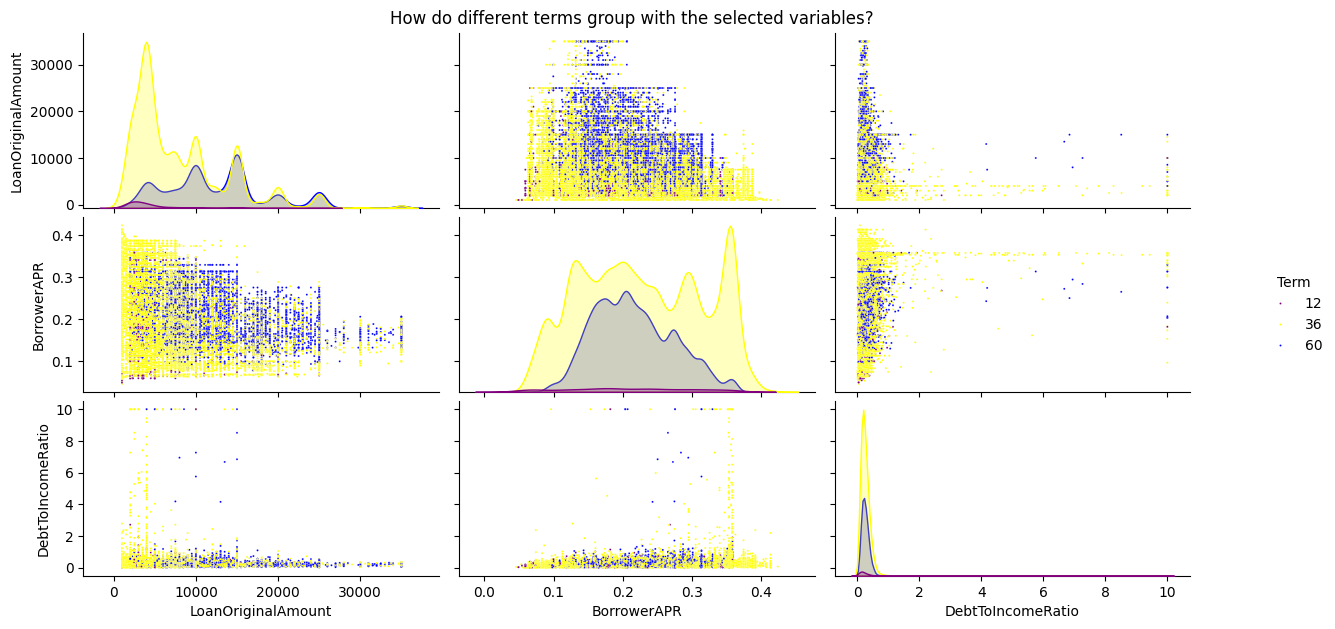

In [49]:
## Plot Matrix
grid = sns.pairplot(data=df, vars=selected_columns, hue='Term', palette=['purple', 'yellow', 'b'], plot_kws = {'s':2})
plt.suptitle('How do different terms group with the selected variables?', y=1.02)
grid.figure.set_size_inches(14, 6);

> Longer terms (36 and 60 months) tend to be associated with higher loan original amounts.

> There doesn't seem to be a strong relationship between term and borrower APR or debt-to-income ratio.

> Loan Original Amount vs. Borrower APR have a weak positive correlation, suggesting that larger loans might have slightly higher APRs. 

## Conclusions

In conclusion, three different visualizations are done in order to explore univariate, bivariate, and multivariate analysis of loan attributes. Here is the list of summary for the findings:

- A majority of loans are currently performing well, with a significant portion successfully completed.
- California and Texas dominate the borrower base, while other states have significantly lower participation.
- Borrower income is a key driver of loan amounts, with higher-income borrowers tending to take larger loans.
- Credit scores vary significantly across employment types, with employed and full-time borrowers generally exhibiting higher scores.
- Students, particularly those attending community colleges, are more likely to be employed than those in technical schools whom they took a loan with Prosper.
- Loan terms influence loan amounts, with longer terms associated with larger loans.
- The loan market has seen increasing loan amounts over time, with a notable spike in 2009.
- Investor participation correlates with monthly loan payments, indicating a relationship between loan size and investor involvement.
- Outliers in investor count and monthly payments suggest potential high-value or complex loan structures.
- Borrower APR is negatively correlated with credit score, indicating a reward for good credit.
- Loan original amount and stated monthly income exhibit a moderate positive correlation, suggesting income as a key factor in borrowing capacity.